In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date')

In [3]:
## REMOVE
df.shape

(1304, 1)

In [5]:
# Clean the data by filtering out days when the page views were 
# in the top 2.5% of the dataset or bottom 2.5% of the dataset.
mask = (df['value'] > df['value'].quantile(0.025)) & (df['value'] < df['value'].quantile(0.975))
df = df[mask]

In [6]:
df.shape

(1238, 1)

In [7]:
def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots(figsize=(14, 4))
    ax.plot(df.index, df['value'])
    
    # Set labels and title
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

def draw_bar_plot():
    # pivot data for bar chart with years as rows and months as columns
    df_bar = df.pivot_table(index=df.index.year, columns=df.index.strftime('%B'), values='value', aggfunc='mean')
    
    # change columns from numbers to month names
    months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    df_bar.columns = months

    # draw and label the bar plot
    fig, ax = plt.subplots(figsize=(12, 6))
    df_bar.plot.bar(xlabel='Years', ylabel='Average Page Views', ax=ax, label='Months')
    ax.legend(title='Months')
    
    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

def draw_box_plot():
    # Prepare data for box plots
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # convert the month column to Categorical so it sorts correctly
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    df_box['month'] = pd.Categorical(df_box['month'], categories=months, ordered=True)

    ## Draw box plots using Seaborn (2 axes in one figure)
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6))
    sns.boxplot(data=df_box, x='year', y='value', ax=ax1)
    sns.boxplot(data=df_box, x='month', y='value', ax=ax2)

    # set titles and labels
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Page Views')
    ax1.set_title('Year-wise Box Plot (Trend)')
    ax2.set_xlabel('Month')
    ax2.set_ylabel('Page Views')
    ax2.set_title('Month-wise Box Plot (Seasonality)')

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig

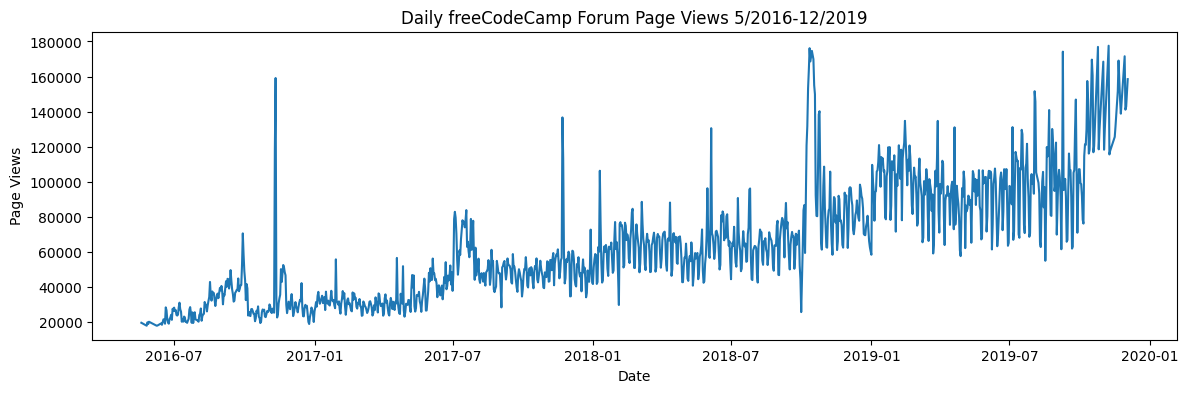

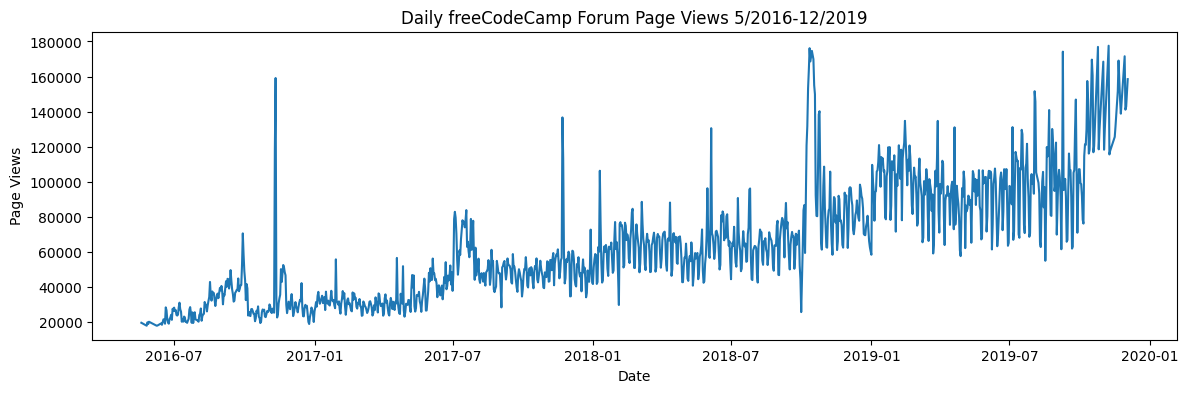

In [8]:
draw_line_plot()

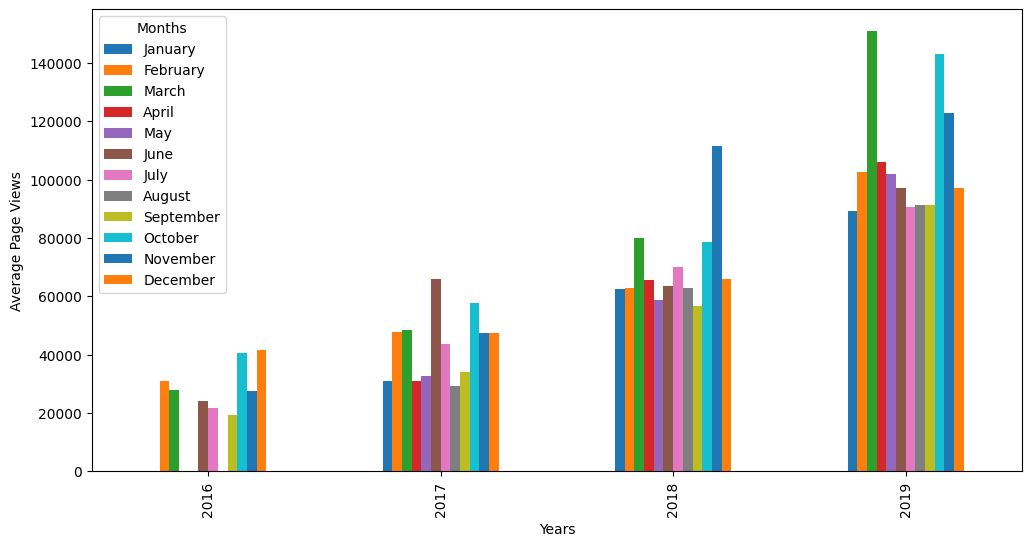

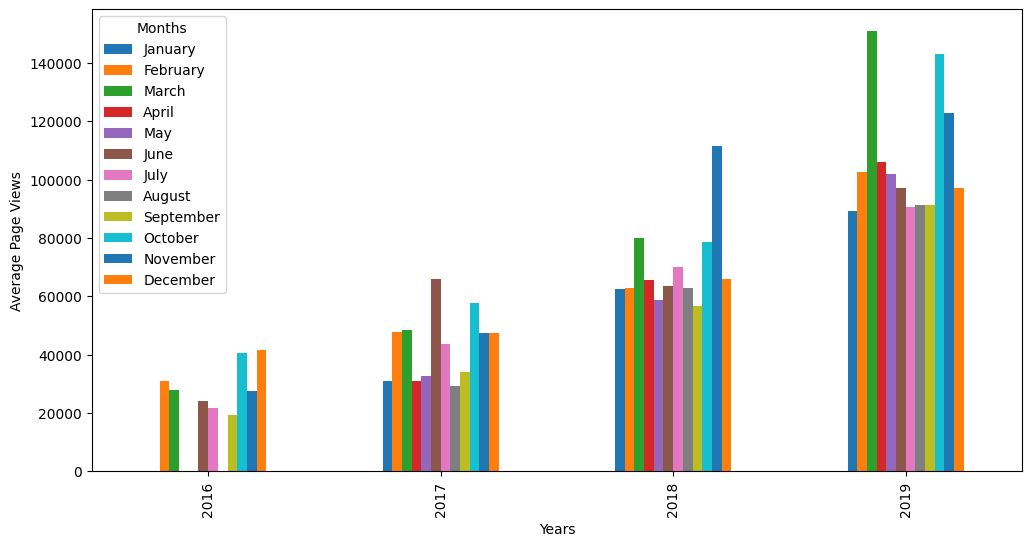

In [18]:
draw_bar_plot()

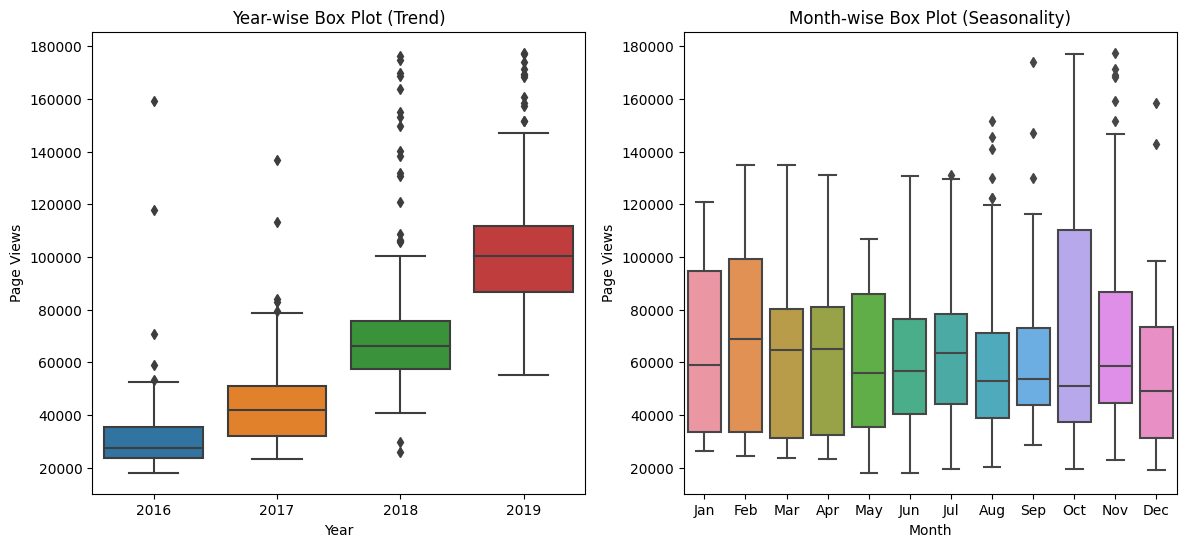

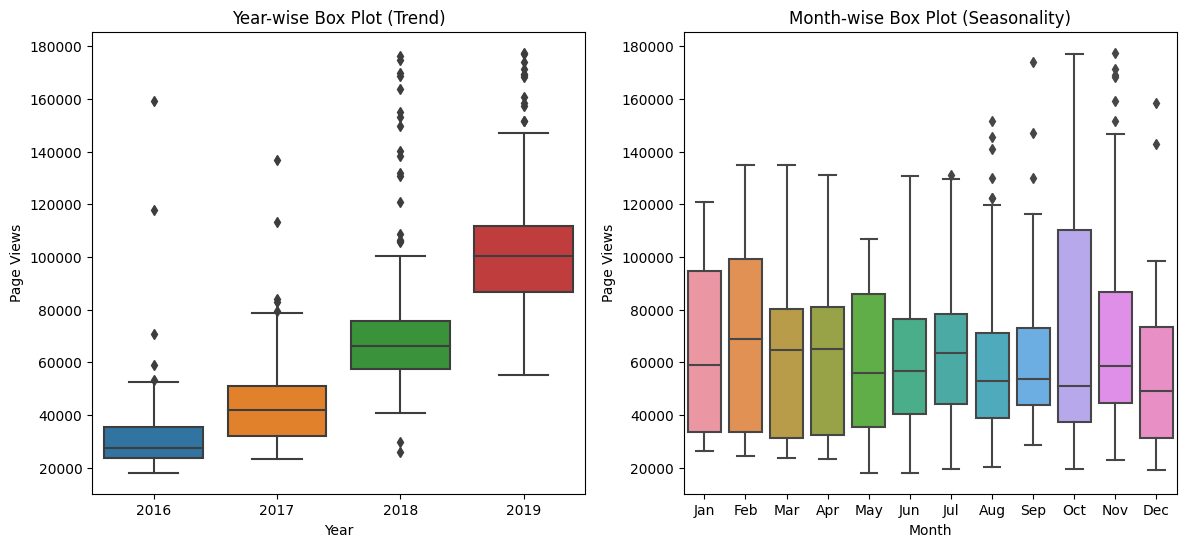

In [20]:
draw_box_plot()